#### INTEGRANTES: JORGE HERRERA - FABIÁN LEAL- ANGIE VILLAMIL

El formato de entrega será subir a u-cursos un Jupyter notebook laboratorio2.ipynb, que se debe ejecutar sin errores desde la primera celda a la última. Todo el código debe estar en el mismo notebook, el código debe estar comentado y el notebook debe estar escrito en forma de informe técnico, escribiendo una celda markdown antes de cada celda de código.

# LABORATORIO 2: ANÁLISIS EXPLORATORIO DE LOS DATOS
Es uno de los primeros pasos en un proyecto de minería de datos luego de la comprensión del problema/negocio y la selección de los datos. Es de suma importancia ya que permite corroborar hipótesis, detectar outliers, estructurar el modelamiento de los datos, resolver problemas de los datos e iterar en el entendimiento del problema.

Algunos de los principales desafíos son como visualizar datos no estructurados (como texto), visualizar estructuras de datos complejas como redes y visualizar conjunto de datos de alta dimensionalidad.

## 1. Pandas
"**Pandas** is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language." 

Recuperado de [https://pandas.pydata.org/](https://pandas.pydata.org/) en Octubre de 2018.

Ejemplo en: [Github/guipsamora/pandas_exercises](https://github.com/guipsamora/pandas_exercises/blob/master/06_Stats/US_Baby_Names/Exercises_with_solutions.ipynb)

In [2]:
# 1. Importar las librerias
import pandas as pd

# 2. Importar los datos
baby_names = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
baby_names.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
Unnamed: 0    1016395 non-null int64
Id            1016395 non-null int64
Name          1016395 non-null object
Year          1016395 non-null int64
Gender        1016395 non-null object
State         1016395 non-null object
Count         1016395 non-null int64
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


In [3]:
# 3. Ver los datos
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


In [4]:
# 4. Eliminar 'Unnamed: 0' y 'Id'
del baby_names['Unnamed: 0']
del baby_names['Id']

baby_names.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


In [5]:
# Primera fila del dataframe
baby_names.iloc[0]


Name      Emma
Year      2004
Gender       F
State       AK
Count       62
Name: 0, dtype: object

In [6]:
# Primera columna
baby_names.iloc[:,0].head(5)

0       Emma
1    Madison
2     Hannah
3      Grace
4      Emily
Name: Name, dtype: object

In [7]:
# 5. Algunas operaciones: contar hombres y mujeres en el dataset
baby_names['Gender'].value_counts()


F    558846
M    457549
Name: Gender, dtype: int64

In [8]:
#Conteo por atributo
baby_names.groupby(['Gender','Year']).size()

Gender  Year
F       2004    48083
        2005    49196
        2006    50851
        2007    52234
        2008    52568
        2009    51987
        2010    51084
        2011    50651
        2012    50722
        2013    50440
        2014    51030
M       2004    38337
        2005    39298
        2006    40952
        2007    42098
        2008    42402
        2009    42622
        2010    42223
        2011    41894
        2012    42302
        2013    42303
        2014    43118
dtype: int64

In [9]:
#Summary
pd.set_option('display.float_format', lambda x: '%.1f' % x) #Desactivar notación científica
baby_names['Year'].describe()

count   1016395.0
mean       2009.1
std           3.1
min        2004.0
25%        2006.0
50%        2009.0
75%        2012.0
max        2014.0
Name: Year, dtype: float64

In [10]:
#Seleccionar con condiciones
baby_names.loc[(baby_names['Year'] == 2012) & (baby_names['State'] == "AK") & (baby_names['Name'] == "Sebastian")]


,Name,Year,Gender,State,Count
4313,Sebastian,2012,M,AK,13


In [11]:
# Buscar nombres que sean unisex
pd.Series(np.intersect1d(baby_names.loc[baby_names['Gender'] == "M"]['Name'],baby_names.loc[baby_names['Gender'] == "F"]['Name']))


NameError: ignored

In [0]:
# Buscar nombres que sean unisex (ahora si)
import timeit
start = timeit.default_timer()
# Buscar nombres de Mujer y Hombre
F_names = baby_names['Name'].loc[(baby_names['Gender'] == "F")]
M_names = baby_names['Name'].loc[(baby_names['Gender'] == "M")]
FM_names = [x for x in list(set(F_names.values.tolist())) if x in list(set(M_names.values.tolist()))]
stop = timeit.default_timer()
print('Time (s): ', stop - start) 
print(FM_names)

len(FM_names)

In [0]:
baby_names.loc[baby_names['Name'] == "Casey"].head(10)

## 2. Librerias para visualización de datos en Python
Top 5 librerias para visualización de datos en Python: [Analytics India Magazine](https://www.analyticsindiamag.com/top-5-best-data-visualisation-libraries-in-python/)

## 3. Ejemplos y documentación

## 4. Tareas de investigación (2 ptos)

### Variables visuales (1,5 ptos)
#### 4.1 Investigue que son las variables visuales y elabore un breve resumen del significado de este concepto.

En el contexto de la cartografía y el lenguaje gráfico, las variables visuales constituyen todas las distintas cualidades en las que pueden diferir dos marcas o símbolos en una representación gráfica.


#### 4.2 Describalas brevemente cada una de las variables visuales.

####Posición: 
Caso particular de variable visual. En un mapa, por ejemplo, dadas sus cualidades intrínsecas, la posición no es una variable, pues ha de tener una posición concreta en este. En otros tipos de gráficos si se considera una variable, pues se puede modificar para transmitir información.

####Forma:
El perimetro es lo que define la forma del objeto. La forma se aplica más que nada a símbolos puntuales. Para símbolos lineales no se aplica, y para simbolos de superficie se produce una representación imprecisa 

####Tamaño: 
Se refiere a la dimensión del simbolo. Si se trata de uno puntual, se aplica solamente haciendolo más grande o pequeño. En el caso de las lineas, se hacen más gruesas, y en las superficies implicaría la modificación de sus formas, por lo que se hace solamente en cartogramas.

####Color: 
Considerada la más importante, y también la que requiere un mayor grado de detalle, debido a todas las posibilidades que ofrece. Hay muchas formas de representar los colores, usando espacios de color. Para este contexto, el espacio HSV (espacio de coordenadas cilíndrico) presenta la mayor relevancia.

####Textura: 
Se manifiesta como rellenos de los símbolos, que sigan algún patron. En el caso puntual, la textura requiere que el símbolo tenga un tamaño suficiente para poder aplicarla. En el caso de las lineas, se entiende como textura el uso de guiones o espacios en blanco, que formen algún patrón de discontinuidad. Sobre símbolos de superficie se aprovechan más las texturas, pues sus grandes dimensiones permiten una percepción completa de lo que se quiere transmitir.

####Orientación: 
Se aplica principalmente sobre símbolos puntuales, geométricos y no pictóricos. Se debe considerar que estos símbolos no pueden tener simetrías que dificulten la percepción (por ejemplo, no tiene sentido darle orientación a un circulo). La aplicación en lineas no es recomendada por el ancho que requieren, y en superficies se podría aplicar orientando su textura.


#### 4.3 Describa la relación entre variables visuales y los atributos de un conjunto de datos en el desarrollo de una visualización.

El objetivo de las técnicas de visualización de datos es proponer perspectivas, usando las variables visuales descritas en 3.2, para maximizar la precisión de percepción que tiene el receptor de la representación gráfica de los atributos representables del conjunto de datos . A modo de ejemplo, se puede pensar en los típicos mapas de calor de meteorología, en donde las zonas con mayor temperatura (atributo de los datos) es representada con colores más rojizos (variable visual).


#### 4.4 Busque una imagen en internet en el que se haya hecho un mal uso de alguna de las variables visuales que usted investigo y reportela justificando porque fue mal elaborada dicha visualización (además inserte el link a la visualización).

http://getdolphins.com/wp-content/uploads/2018/02/NFC-data.png

#### Variable color: 
En esta imagen, en donde se grafican las probabilidades que tienen 4 equipos de ganar, los "Rams" y los "Seahawks", son representados con colores prácticamente idénticos, y por este motivo es sumamente difícil distinguir qué linea representa a qué equipo.


### Visualización de datos multidimensional (0,5 ptos)
#### 4.5 Investigue sobre al menos 2 técnicas de datos para la visualización de datos multidimensional. Reportelos con una breve descripción (puede utilizar imágenes si considera que apoyan la explicación de la visualización).

Un tipo de representación multidimensional es la poligonal. Esta consiste en representar los atributos de los datos mediante polígonos concéntricos, en donde se le asigna un polígono a cada individuo, en donde cada vertice representa un atributo (por ejemplo peso), y la distancia entre el centro y los vértices representa la magnitud de este atributo La idea de que los polígonos sean concéntricos permite comparar todos los atributos de varios individuos al mismo tiempo. Los videojuegos de fútbol de la primera decada del siglo representaban las habilidades de los jugadores mediante una técnica muy parecida a esta.

La diferencia con esos videojuegos, es que en este caso es necesario situar a los individuos como puntos dentro de los polígonos, y la posición específica en donde se situa sigue la formula que se usa para calcular centro de masas, siendo en este caso sus vértices las masas, cada uno con la misma ponderación.

Para expresar las correlaciones entre individuos, se emplea la formula del coeficiente de Pearson, mientras más positivo el valor de correlación entre los atributos, más intenso el verde de la linea que los une. Mientras más negativo, más roja.

Otro tipo de representación mucho más simple es la matriz de gráficos de dispersión, en donde los ejes X e Y de los gráficos son atributos, y estos últimos van variando según la posición en la matriz. La diagonal de la matriz, por supuesto, está vacía, pues esta diagonal está compuesta de gráficos de dispersión de un atributo versus el mismo.





In [0]:
from IPython.display import Image
Image("Poligono.PNG")

1. Ejemplos para Matplotlib, Seaborn, Altair, Plotly y Bokeh en: [Charts in Colaboratory](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=hFCg8XrdO4xj)

2. Una de las mejores integraciones para visualizar grafos se obtiene con la libreria [Networkx](https://networkx.github.io/documentation/stable/auto_examples/index.html) y [Holoviews](http://holoviews.org/getting_started/Tabular_Datasets.html)

3. Parallel Coordinates con Plotly: [Plotly Parallel Coord](https://plot.ly/python/parallel-coordinates-plot/) (Advertencia: esta libreria requiere entender su uso offline)

## 5. Ejercicio Laboratorio (4 ptos)


---
Considere el problema que enfrenta una entidad financiera que tiene altas tasas de fuga voluntaria. Esta institución no tiene claro cuál es el perfil característico que tienen los clientes fugitivos ni cuáles son las razones por las cuales estos se fugan.

El gerente general le ha pedido **definir el patrón característico de los clientes fugitivos y de los clientes no fugitivos con el objetivo de definir una serie de políticas comerciales** que permitan retener a estos potenciales clientes fugitivos.

#### Entregables:

5.1 Muestre al menos 3 gráficos que muestren diferencias entre el grupo que se fuga y el que no (3 ptos)

5.2 Implemente al menos uno de los gráficos para la visualización de datos multidimensionales que investigo en la parte anterior. La idea es que este gráfico resuma los resultados obtenidos del proceso de análisis exploratorio de los datos (i.e, muestra en una visualización las diferencias en los atributos que caracterizan ambas poblaciones) (1 pto)

---
Variable | Descripción
------------- | -------------
1. ID | Identificador del cliente
2. Genero | Genero del cliente
3. Renta | Renta en pesos
4. Edad | Edad en años
5. NIV_Educ | Nivel educacional
6. E_Civil | Estado civil
7. COD_OfI | Código de la oficina 
8. Ciudad | Ciudad de la oficina
9. D_Marzo | Deuda de Marzo
10. D_Abril | Deuda de Abril 
11. D_Mayo | Deuda de Mayo
12. D_Junio | Deuda de Junio 
13. D_Julio | Deuda de Julio 
14. D_Agosto | Deuda de Agosto 
15. D_Septiembre | Deuda de Septiembre
16. M_Moroso | Meses en Mora
17. Monto | Monto preaprobado 
18. Seguro | Seguro de gravamen 
19. Fuga | Variable objetivo


In [0]:
!pip install plotly

In [0]:
!pip install xlrd

In [13]:
from google.colab import files
uploaded = files.upload()

Saving Fuga_Bancos.xlsx to Fuga_Bancos.xlsx


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:482: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



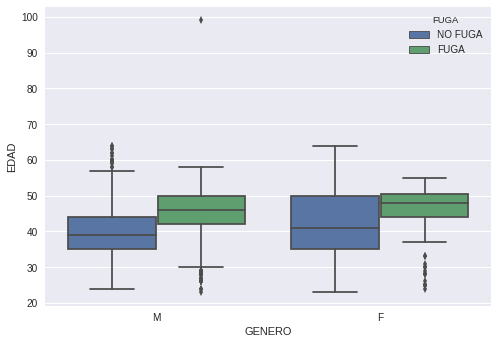

In [14]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from pandas import ExcelWriter
from pandas import ExcelFile

Fuga = pd.read_excel('Fuga_Bancos.xlsx')

sns.boxplot(x='GENERO', y="EDAD", hue='FUGA', data=Fuga)

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1468: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



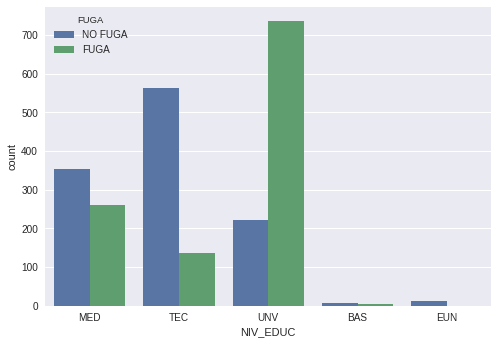

In [15]:
sns.countplot(x='NIV_EDUC',hue='FUGA', data=Fuga)

In [0]:
sns.countplot(x='GENERO',hue='FUGA', data=Fuga)

In [0]:
sns.countplot(x='EDAD',hue='FUGA', data=Fuga)

In [0]:
sns.countplot(x='E_CIVIL',hue='FUGA', data=Fuga)

In [0]:
sns.countplot(x='SEGURO',hue='FUGA', data=Fuga)

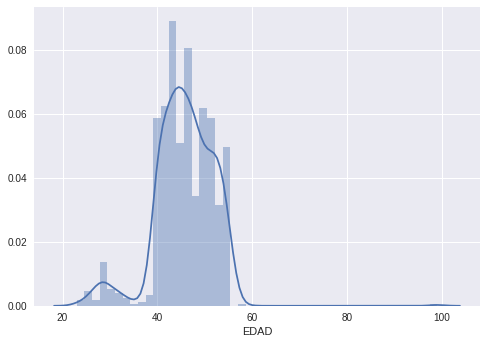

In [16]:
sns.distplot(Fuga.loc[(Fuga['FUGA']=="FUGA")&(Fuga['GENERO']=='M')]['EDAD'])

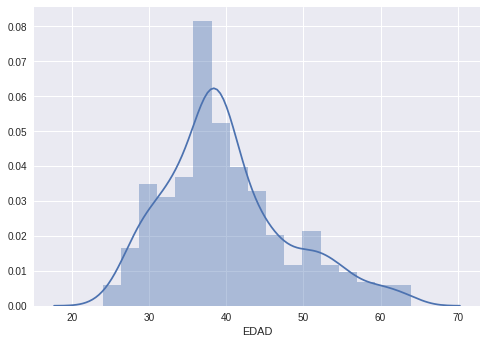

In [17]:
sns.distplot(Fuga.loc[(Fuga['FUGA']=="NO FUGA")&(Fuga['GENERO']=='M')]['EDAD'])

In [0]:
sns.distplot(Fuga.loc[(Fuga['FUGA']=="FUGA")&(Fuga['GENERO']=='F')]['EDAD'])

In [0]:
sns.distplot(Fuga.loc[(Fuga['FUGA']=="NO FUGA")&(Fuga['GENERO']=='F')]['EDAD'])

TypeError: ignored

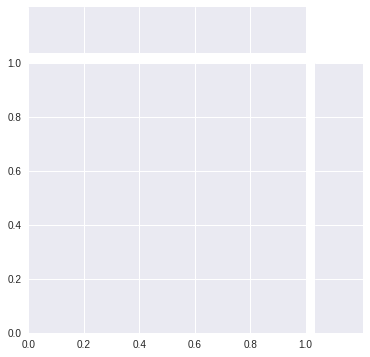

In [21]:
#sns.jointplot(x=np.log(Fuga["RENTA"]), y="MONTO",kind='hex',color='k', data=Fuga.loc[Fuga['FUGA']=='FUGA'])#
#sns.jointplot(x=np.log(Fuga["RENTA"]), y="MONTO",kind='hex',color='k', data=Fuga.loc[Fuga['FUGA']=='NO FUGA'])

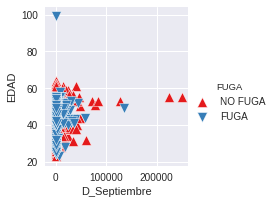

In [18]:
g = sns.FacetGrid(Fuga, hue="FUGA", palette="Set1", hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "D_Septiembre", "EDAD", s=100, linewidth=.5, edgecolor="white")
g.add_legend()

In [23]:
py.sign_in('jorge.herrera', 'ccDQGZTA5Z4sfHO21ynf')

data = [
    go.Parcoords(
        line = dict(color = Fuga['FUGA'],
                   colorscale = [['NO FUGA','#D7C16B'],['FUGA','#23D8C3']]),
        dimensions = list([
            dict(label = 'D_Marzo', values = Fuga['D_Marzo']),
            dict(label = 'D_Abril', values = Fuga['D_Abril']),
            dict(label = 'D_Mayo', values = Fuga['D_Mayo']),
            dict(label = 'D_Junio', values = Fuga['D_Junio']),
            dict(label = 'D_Julio', values = Fuga['D_Julio']),
            dict(label = 'D_Agosto', values = Fuga['D_Agosto']),
            dict(label = 'D_Septiembre', values = Fuga['D_Septiembre'])
        ])
    )
]

layout = go.Layout(
    plot_bgcolor = '#E5E5E5',
    paper_bgcolor = '#E5E5E5'
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-basic')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jorge.herrera/0 or inside your plot.ly account where it is named 'parcoords-basic'


#bonus: buscar nombres que sean unisex 

In [0]:
# Buscar nombres que sean unisex
pd.Series(np.intersect1d(baby_names.loc[baby_names['Gender'] == "M"]['Name'],baby_names.loc[baby_names['Gender'] == "F"]['Name']))
